In [1]:
# Importing files
import os as files_upload #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
import math as m1

# Ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_auc_score, confusion_matrix,
                             accuracy_score, roc_curve,
                             precision_recall_curve, f1_score)
from sklearn.metrics import auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier

# Setting default theme
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

# Warning handling
warnings.filterwarnings("ignore")

In [2]:
# List all files under the input directory
for dirname, _, filenames in files_upload.walk('/Data'):
    for filename in filenames:
        print(files_upload.path.join(dirname, filename))

In [3]:
# Path for the training set
training_data_path = "Data/train_u6lujuX_CVtuZ9i.csv"
# Path for the testing set
testing_data_path = "Data/test_Y3wMUE5_7gLdaTN.csv"

In [4]:
# Reading csv file as a DataFrame
training_dataframe = pd.read_csv(training_data_path)
# First 5 rows
training_dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Reading csv file as a DataFrame
testing_dataframe = pd.read_csv(testing_data_path)
# First 5 rows
testing_dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
# Both Dataset Details
print(f"Training Dataset Details (row, col): {training_dataframe.shape}\n\nTesting Dataset Details (row, col): {testing_dataframe.shape}")

Training Dataset Details (row, col): (614, 13)

Testing Dataset Details (row, col): (367, 12)


In [7]:
# Training Dataframe column information
training_dataframe.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Statistics for Training Dataframe
training_dataframe.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# The Loan_Id column is not needed, let's drop it for both test and train datasets
training_dataframe.drop('Loan_ID',axis=1,inplace=True)
testing_dataframe.drop('Loan_ID',axis=1,inplace=True)
# Checking the new shapes
print(f"training set (row, col): {training_dataframe.shape}\n\ntesting set (row, col): {testing_dataframe.shape}")

training set (row, col): (614, 12)

testing set (row, col): (367, 11)


In [10]:
#missing values in decsending order
testing_dataframe.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

<Figure size 720x432 with 0 Axes>

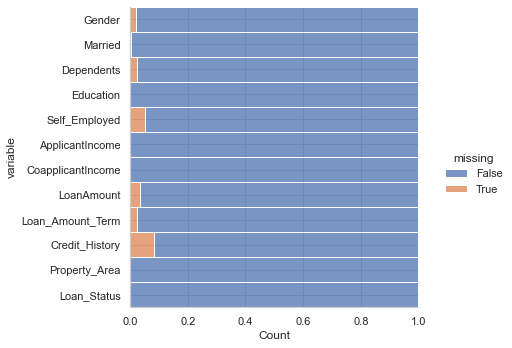

In [11]:
plt.figure(figsize=(10,6))
sns.displot(
    data=training_dataframe.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

plt.show()

Before filling missing values

 ################################################## 

Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 --------------------------------------------------
Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64
 --------------------------------------------------
LoanAmount:
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------
Gender:
Male      489
Female    112
Name: Gender, dtype

<Figure size 720x432 with 0 Axes>

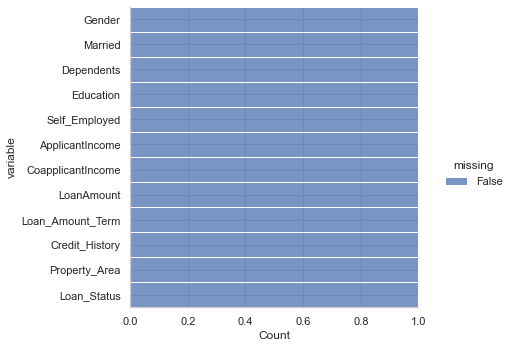

In [12]:
#filling the missing data
print("Before filling missing values\n\n","#"*50,"\n")
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']


for col in null_cols:
    print(f"{col}:\n{training_dataframe[col].value_counts()}\n","-"*50)
    training_dataframe[col] = training_dataframe[col].fillna(
    training_dataframe[col].dropna().mode().values[0] )   

    
training_dataframe.isnull().sum().sort_values(ascending=False)
print("After filling missing values\n\n","#"*50,"\n")
for col in null_cols:
    print(f"\n{col}:\n{training_dataframe[col].value_counts()}\n","-"*50)

    
plt.figure(figsize=(10,6))
sns.displot(
    data=training_dataframe.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",

    
    multiple="fill",
    aspect=1.25)

plt.show()

In [13]:
################## Delete
# Reading csv file as a DataFrame
testing_dataframe = pd.read_csv(testing_data_path)
# First 5 rows
testing_dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [14]:
#list of all the columns.columns

num = training_dataframe.select_dtypes('number').columns.to_list()

#list of all the categoric columns
cat = training_dataframe.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  training_dataframe[num]
#categoric df
loan_cat = training_dataframe[cat]



Y    422
N    192
Name: Loan_Status, dtype: int64


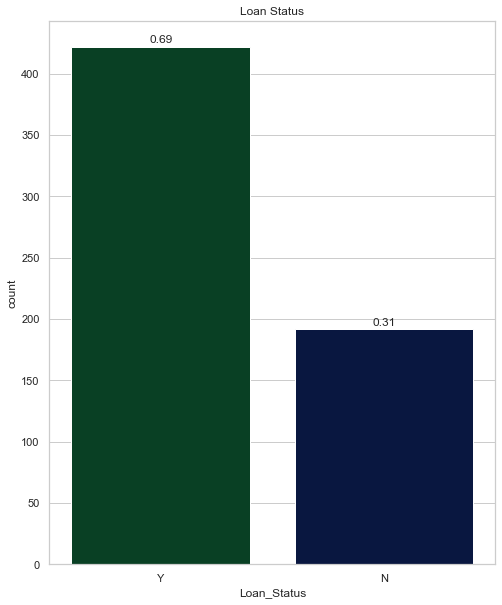

In [15]:
print(training_dataframe[cat[-1]].value_counts())
total = float(len(training_dataframe[cat[-1]]))


plt.figure(figsize=(8,10))
plt.title("Loan Status")

sns.set(style="whitegrid",palette="ocean")
ax = sns.countplot(training_dataframe[cat[-1]])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 
plt.show()

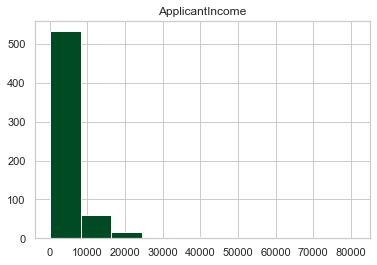

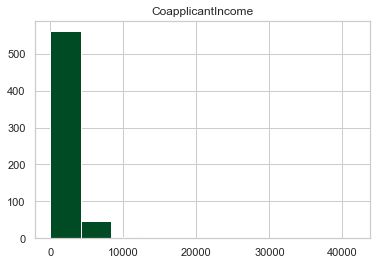

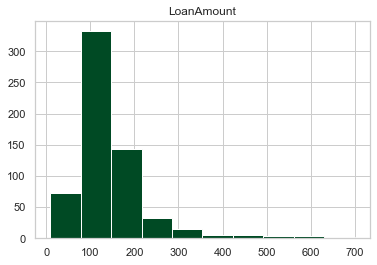

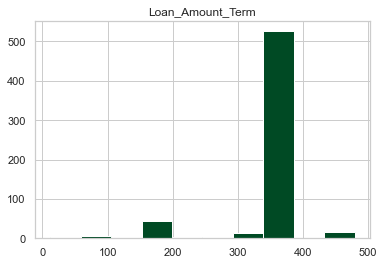

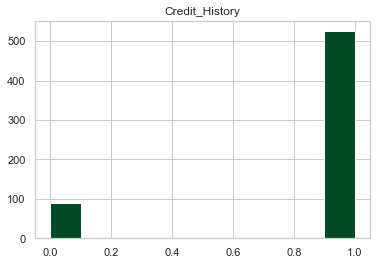

In [16]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

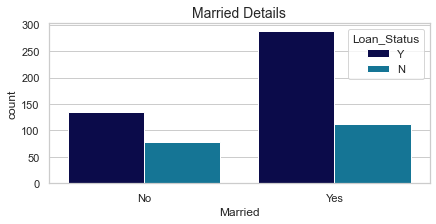

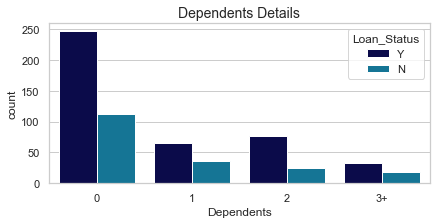

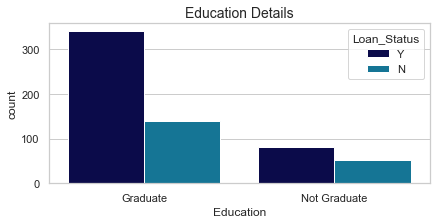

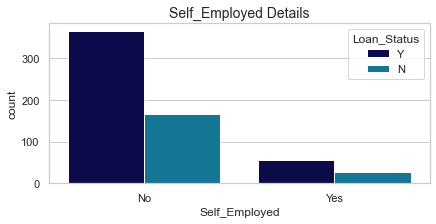

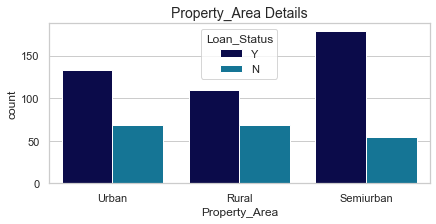

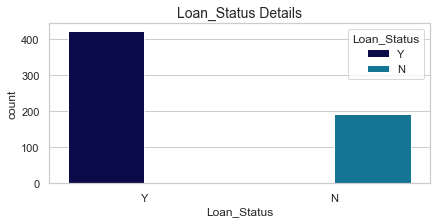

In [17]:
for i in cat[1:]: 
    plt.figure(figsize=(15,10))
    plt.subplot(3,2,1)
    sns.countplot(x=i ,hue='Loan_Status', data=training_dataframe, palette='ocean')
    plt.title(i + " Details", fontsize=14)

In [18]:
#converting categorical values to numbers
to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
training_dataframe = training_dataframe.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
testing_dataframe = testing_dataframe.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# convertind the Dependents column
Dependents_ = pd.to_numeric(training_dataframe.Dependents)
Dependents__ = pd.to_numeric(testing_dataframe.Dependents)

# dropping the previous Dependents column
training_dataframe.drop(['Dependents'], axis = 1, inplace = True)
testing_dataframe.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
training_dataframe = pd.concat([training_dataframe, Dependents_], axis = 1)
testing_dataframe = pd.concat([testing_dataframe, Dependents__], axis = 1)

# checking the our manipulated dataset for validation
print(f"training dataset (row, col): {training_dataframe.shape}\n\ntesting dataset (row, col): {testing_dataframe.shape}\n")
print(training_dataframe.info(), "\n\n", testing_dataframe.info())

training dataset (row, col): (614, 12)

testing dataset (row, col): (367, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 1

Text(0.5, 1.0, 'Correlation Heatmap')

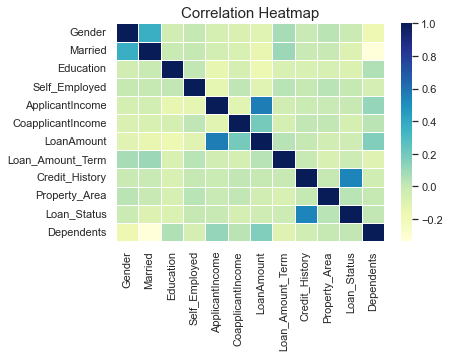

In [19]:
# Plotting the correlation matrix
sns.heatmap(training_dataframe.corr() , linewidths=.5, cmap="YlGnBu")
plt.title("Correlation Heatmap", size=15)

In [20]:
# Correlation table

corr = training_dataframe.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.00,0.36,-0.05,-0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.03,-0.02,-0.17
Married,0.36,1.00,-0.01,0.00,-0.05,-0.08,-0.15,0.10,-0.01,-0.00,-0.09,-0.33
Education,-0.05,-0.01,1.00,0.01,-0.14,-0.06,-0.17,-0.07,-0.07,-0.07,-0.09,0.06
Self_Employed,-0.00,0.00,0.01,1.00,-0.13,0.02,-0.11,0.03,0.00,0.03,0.00,-0.06
ApplicantIncome,-0.06,-0.05,-0.14,-0.13,1.00,-0.12,0.56,-0.05,-0.02,-0.01,-0.00,0.12
CoapplicantIncome,-0.08,-0.08,-0.06,0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06,0.03
LoanAmount,-0.11,-0.15,-0.17,-0.11,0.56,0.19,1.00,0.04,-0.00,-0.05,-0.03,0.16
Loan_Amount_Term,0.07,0.10,-0.07,0.03,-0.05,-0.06,0.04,1.00,-0.00,-0.08,-0.02,-0.10
Credit_History,-0.01,-0.01,-0.07,0.00,-0.02,0.01,-0.00,-0.00,1.00,0.00,0.54,-0.04
Property_Area,0.03,-0.00,-0.07,0.03,-0.01,0.01,-0.05,-0.08,0.00,1.00,0.03,-0.00


In [21]:
y = training_dataframe['Loan_Status']
X = training_dataframe.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

# Prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.49      0.44      0.46        43
           1       0.79      0.82      0.81       111

    accuracy                           0.71       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.71      0.71      0.71       154

71.43% Accurate


<Figure size 1152x576 with 0 Axes>

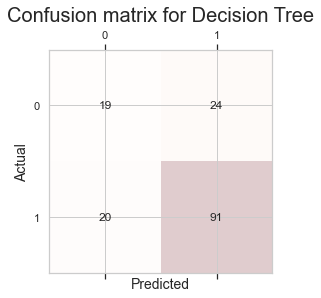

In [23]:
Decision_Tree=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Decision_Tree.to_csv("Data/Dection Tree.csv")
dt_preds= DT.predict(X_test)
conf_mat_dt = confusion_matrix(y_test, dt_preds)

plt.figure(figsize=(16, 8))
plt.matshow(conf_mat_dt, cmap=plt.cm.Reds, alpha=0.2)
for i in range(2):
    for j in range(2):
        plt.text(x=j, y=i, s=conf_mat_dt[i, j], ha="center", va="center")
plt.title("Confusion matrix for Decision Tree", y=1.1, fontdict={"fontsize": 20})
plt.xlabel("Predicted", fontdict={"fontsize": 14})
plt.ylabel("Actual", fontdict={"fontsize": 14});

In [24]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

# Prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print(f"{round(accuracy_score(y_predict,y_test)*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154

83.77% Accurate


<Figure size 1152x576 with 0 Axes>

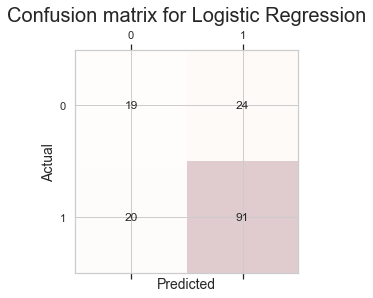

Feature: 0, Score: 0.11882
Feature: 1, Score: -0.33638
Feature: 2, Score: -0.52876
Feature: 3, Score: 0.20101
Feature: 4, Score: 0.00001
Feature: 5, Score: -0.00007
Feature: 6, Score: -0.00120
Feature: 7, Score: -0.00341
Feature: 8, Score: 3.04162
Feature: 9, Score: 0.05294
Feature: 10, Score: -0.02582


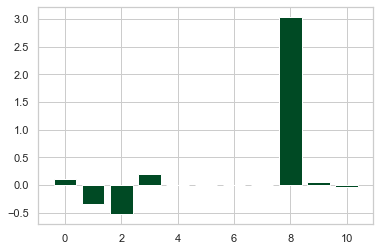

In [25]:
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Logistic_Regression.to_csv("Data/Logistic Regression.csv")
LR_preds= LR.predict(X_test)
conf_mat_LR = confusion_matrix(y_test, LR_preds)
plt.figure(figsize=(16, 8))
plt.matshow(conf_mat_dt, cmap=plt.cm.Reds, alpha=0.2)
for i in range(2):
    for j in range(2):
        plt.text(x=j, y=i, s=conf_mat_dt[i, j], ha="center", va="center")
plt.title("Confusion matrix for Logistic Regression", y=1.1, fontdict={"fontsize": 20})
plt.xlabel("Predicted", fontdict={"fontsize": 14})
plt.ylabel("Actual", fontdict={"fontsize": 14});
plt.show()
importance = LR.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [26]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

# Prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.69      0.47      0.56        43
           1       0.82      0.92      0.86       111

    accuracy                           0.79       154
   macro avg       0.75      0.69      0.71       154
weighted avg       0.78      0.79      0.78       154

79.22% Accurate


<Figure size 1152x576 with 0 Axes>

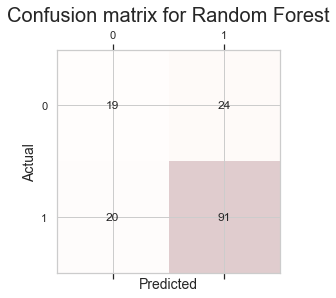

In [27]:
Random_Forest=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest.to_csv("Data/Random Forest.csv")
RF_preds= RF.predict(X_test)
conf_mat_RF = confusion_matrix(y_test, RF_preds)

plt.figure(figsize=(16, 8))
plt.matshow(conf_mat_dt, cmap=plt.cm.Reds, alpha=0.2)
for i in range(2):
    for j in range(2):
        plt.text(x=j, y=i, s=conf_mat_dt[i, j], ha="center", va="center")
plt.title("Confusion matrix for Random Forest", y=1.1, fontdict={"fontsize": 20})
plt.xlabel("Predicted", fontdict={"fontsize": 14})
plt.ylabel("Actual", fontdict={"fontsize": 14});

              precision    recall  f1-score   support

           0       0.62      0.58      0.60        43
           1       0.84      0.86      0.85       111

    accuracy                           0.79       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154

78.57% Accurate


<Figure size 1152x576 with 0 Axes>

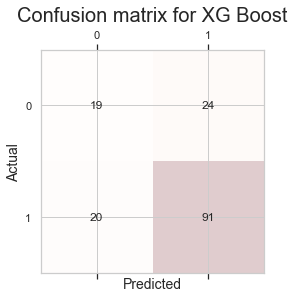

In [28]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  Prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

XG_preds= XGB.predict(X_test)
conf_mat_XG = confusion_matrix(y_test, XG_preds)

plt.figure(figsize=(16, 8))
plt.matshow(conf_mat_dt, cmap=plt.cm.Reds, alpha=0.2)
for i in range(2):
    for j in range(2):
        plt.text(x=j, y=i, s=conf_mat_dt[i, j], ha="center", va="center")
plt.title("Confusion matrix for XG Boost", y=1.1, fontdict={"fontsize": 20})
plt.xlabel("Predicted", fontdict={"fontsize": 14})
plt.ylabel("Actual", fontdict={"fontsize": 14});

In [29]:
# Model Score Comparison
score = [DT_SC,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({
    'Model': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Model,Score
3,Logistic Regression,0.837662
1,Random Forest,0.792208
2,XGBoost,0.785714
0,Decision Tree,0.714286


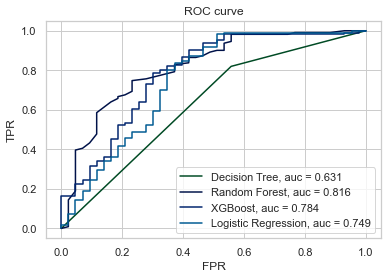

In [30]:
#ROC curve

models = {"Decision Tree":DT,"Random Forest":RF,"XGBoost":XGB, "Logistic Regression":LR}

for name, model in models.items():
            model_probs = model.predict_proba(X_test)[:, 1]
        
            model_auc_score = roc_auc_score(y_test, model_probs)
            
            yhat = model.predict(X_test)
            
            fpr, tpr, _ = roc_curve(y_test, model_probs)
            
            precision, recall, _ = precision_recall_curve(y_test, model_probs)
            
            model_f1, model_auc_PR = f1_score(y_test, yhat), auc(recall, precision)
            
            plt.plot(fpr, tpr, label=f"{name}, auc = {model_auc_score:.3f}")
            
            
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.show()